In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
df = pd.read_csv("Clean_Dataset.csv")
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


In [9]:
df[df.duplicated()]
## Now duplicates found.

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price


In [10]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [11]:
## Ranaming the airline version
df['airline'].replace({"Air_India":"Air India", "GO_FIRST": "Go First"}, inplace=True)
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'Go First', 'Indigo',
       'Air India'], dtype=object)

In [12]:
## Renaming departure time and arrival time
df['departure_time'].unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [13]:
time_rename = {"Early_Morning": "Early Morning", "Late_Night": "Late Night"}
df['departure_time'].replace(time_rename, inplace=True)
df['arrival_time'].replace(time_rename, inplace=True)
df['departure_time'].unique(), df['arrival_time'].unique()

(array(['Evening', 'Early Morning', 'Morning', 'Afternoon', 'Night',
        'Late Night'], dtype=object),
 array(['Night', 'Morning', 'Early Morning', 'Afternoon', 'Evening',
        'Late Night'], dtype=object))

In [14]:
df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [15]:
df['stops'].replace({"two_or_more":"Two or more"}, inplace=True)
df['stops'].unique()

array(['zero', 'one', 'Two or more'], dtype=object)

<Axes: xlabel='airline,class'>

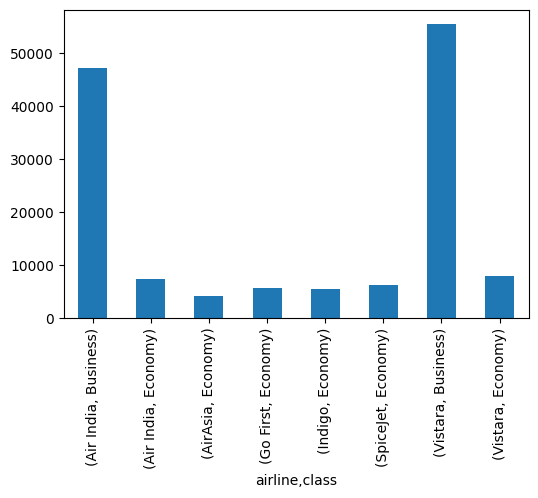

In [16]:
df.groupby(['airline', 'class'])['price'].mean().plot(kind='bar',figsize=(6, 4))

In [17]:
## Only two flight have bussiness class : Air India and Vistara
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [18]:
## Total no of different flights
df['flight'].unique().shape

(1561,)

In [19]:
## total no of flights from source to destination
df.groupby(['source_city', 'destination_city'])['flight'].unique().index.shape

(30,)

In [20]:
## There are 30 flight between arrival and destinations

In [21]:
df.groupby(['source_city', 'destination_city'])['duration'].mean().head(10)

source_city  destination_city
Bangalore    Chennai             14.480207
             Delhi                9.779956
             Hyderabad           14.162433
             Kolkata             13.099143
             Mumbai              10.905072
Chennai      Bangalore           13.952594
             Delhi               11.149374
             Hyderabad           13.153985
             Kolkata             14.515774
             Mumbai              12.374656
Name: duration, dtype: float64

In [22]:
df.head(2)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early Morning,zero,Morning,Mumbai,Economy,2.33,1,5953


C:\Users\thaku\AppData\Local\Temp\ipykernel_9096\3317931085.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], kde=True)


<Axes: xlabel='price', ylabel='Density'>

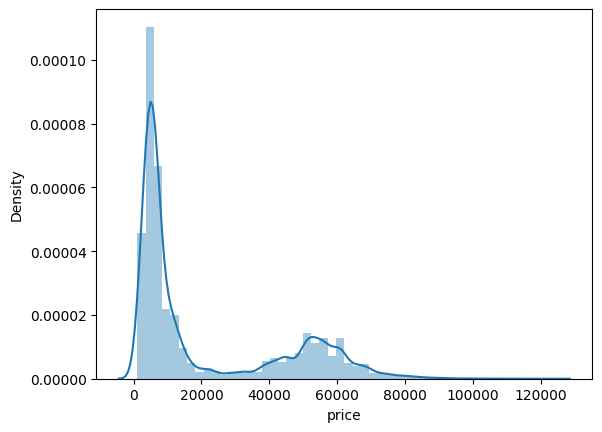

In [23]:
sns.distplot(df['price'], kde=True)

In [24]:
## Checking any price less than or equal to 0
(df['price'] <= 0).sum()

0

<Axes: ylabel='price'>

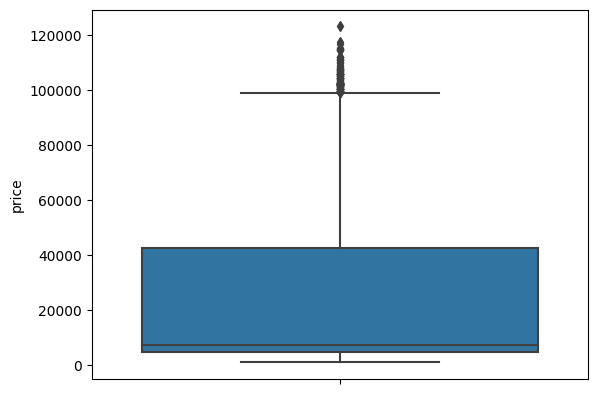

In [25]:
## Cheking the outliers in price columns
sns.boxplot(df, y = 'price')

In [26]:
## Finding the inter quartil range
def IQR(x):

    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)

    iqr = q3 - q1

    lower_range = q1 - 1.5 * iqr
    upper_range = q3 + 1.5 * iqr
    return lower_range, upper_range

In [27]:
## Finding the lower and upper range of price
lower_price_range, upper_price_range = IQR(df['price'])
lower_price_range, upper_price_range
## Here lower range will be > 0 not the negative number

(-51824.0, 99128.0)

In [28]:
new_df = df[df['price'] < upper_price_range]
new_df.shape

(300030, 11)

C:\Users\thaku\AppData\Local\Temp\ipykernel_9096\2819714399.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(new_df['price']))


<Axes: xlabel='price', ylabel='Density'>

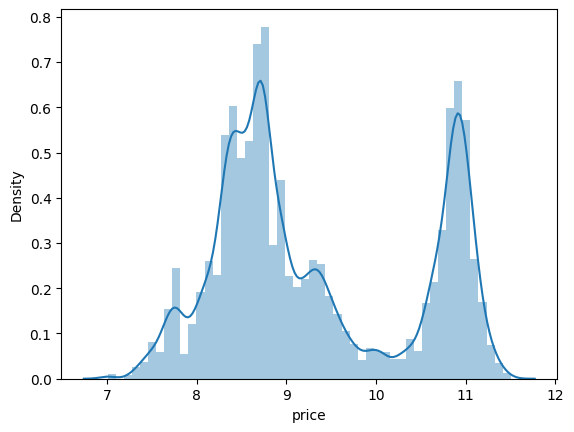

In [29]:
## Trying the log normalization
sns.distplot(np.log(new_df['price']))

In [30]:
## Bussinness class creating biased distribution
(df['class'] == 'Business').sum()

93487

C:\Users\thaku\AppData\Local\Temp\ipykernel_9096\1526357326.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df[df['class'] == 'Economy']['price']), kde=True)


<Axes: xlabel='price', ylabel='Density'>

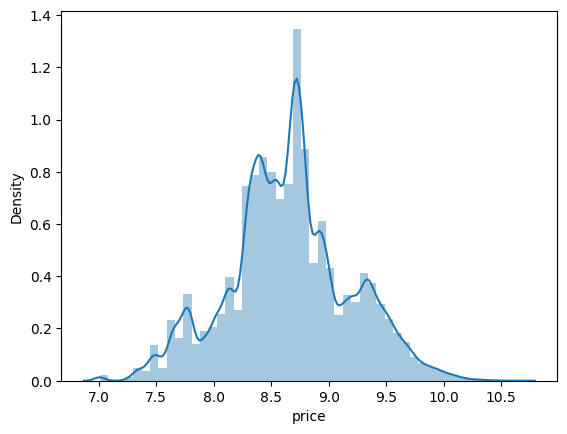

In [31]:
sns.distplot(np.log(df[df['class'] == 'Economy']['price']), kde=True)

In [32]:
new_df['new_price'] = np.log(new_df['price'])
new_df.head()

C:\Users\thaku\AppData\Local\Temp\ipykernel_9096\3015734405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['new_price'] = np.log(new_df['price'])


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,new_price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,8.691651
1,SpiceJet,SG-8157,Delhi,Early Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,8.691651
2,AirAsia,I5-764,Delhi,Early Morning,zero,Early Morning,Mumbai,Economy,2.17,1,5956,8.692154
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,8.691986
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,8.691986


In [33]:
## Drop the price
new_df.drop('price', inplace=True, axis=1)
new_df.head(2)

C:\Users\thaku\AppData\Local\Temp\ipykernel_9096\2203000738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop('price', inplace=True, axis=1)


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,new_price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,8.691651
1,SpiceJet,SG-8157,Delhi,Early Morning,zero,Morning,Mumbai,Economy,2.33,1,8.691651


In [34]:
new_df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,new_price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,8.691651
1,SpiceJet,SG-8157,Delhi,Early Morning,zero,Morning,Mumbai,Economy,2.33,1,8.691651
2,AirAsia,I5-764,Delhi,Early Morning,zero,Early Morning,Mumbai,Economy,2.17,1,8.692154
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,8.691986
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,8.691986


In [35]:
## Here time is given in format like
## H. m/60 * 100
## So convert it into the minutes
new_df['duration'] = new_df['duration'].apply(lambda x : np.round(int(x)*60 + (x - int(x))*60))

C:\Users\thaku\AppData\Local\Temp\ipykernel_9096\1723308959.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['duration'] = new_df['duration'].apply(lambda x : np.round(int(x)*60 + (x - int(x))*60))


In [36]:
new_df.head(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,new_price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,130.0,1,8.691651
1,SpiceJet,SG-8157,Delhi,Early Morning,zero,Morning,Mumbai,Economy,140.0,1,8.691651
2,AirAsia,I5-764,Delhi,Early Morning,zero,Early Morning,Mumbai,Economy,130.0,1,8.692154


In [37]:
## Seperating the categorical and numerical columns
categorical = []
numerical = []
for col in new_df.columns:
    if new_df[col].dtype == 'O':
        categorical.append(col)
    else:
        numerical.append(col)
categorical, numerical

(['airline',
  'flight',
  'source_city',
  'departure_time',
  'stops',
  'arrival_time',
  'destination_city',
  'class'],
 ['duration', 'days_left', 'new_price'])

In [38]:
## Now Encode all the string variables

for col in categorical:
    print(f"No of unique in {col}: {new_df[col].unique().shape[0]}")

No of unique in airline: 6
No of unique in flight: 1561
No of unique in source_city: 6
No of unique in departure_time: 6
No of unique in stops: 3
No of unique in arrival_time: 6
No of unique in destination_city: 6
No of unique in class: 2


In [39]:
## Using one hot encoding will increase the dimension
## So will use the label encoder on categorical columns

In [40]:
from sklearn.preprocessing import LabelEncoder

## Creating the label encoder for each columns
encoder = {}
for col in categorical:
    encoder[col] = LabelEncoder()
    encoder[col].fit(new_df[col])
encoder

{'airline': LabelEncoder(),
 'flight': LabelEncoder(),
 'source_city': LabelEncoder(),
 'departure_time': LabelEncoder(),
 'stops': LabelEncoder(),
 'arrival_time': LabelEncoder(),
 'destination_city': LabelEncoder(),
 'class': LabelEncoder()}

In [41]:
def process_data(new_df):
    new_data = {}
    for col in categorical:
        new_data[col] = encoder[col].transform(new_df[col])
    for col in numerical:
        new_data[col] = new_df[col]
    return pd.DataFrame(new_data)

In [42]:
final_df = process_data(new_df)
final_df.head()


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,new_price
0,4,1408,2,2,2,5,5,1,130.0,1,8.691651
1,4,1387,2,1,2,4,5,1,140.0,1,8.691651
2,1,1213,2,1,2,1,5,1,130.0,1,8.692154
3,5,1559,2,4,2,0,5,1,135.0,1,8.691986
4,5,1549,2,4,2,4,5,1,140.0,1,8.691986


In [43]:
final_df.to_csv('final_data.csv', index=False)

In [44]:
final_df = pd.read_csv('final_data.csv')
final_df.head(2)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,new_price
0,4,1408,2,2,2,5,5,1,130.0,1,8.691651
1,4,1387,2,1,2,4,5,1,140.0,1,8.691651


In [45]:
## Splitting into dependent and independent features
X = final_df.drop('new_price', axis=1)
y = final_df['new_price']

In [46]:
## Splitting the data into train and test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((240024, 10), (240024,), (60006, 10), (60006,))

In [47]:
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
def score(pred, actual):
    # pred = np.round(np.exp(pred))
    actual = np.round(np.exp(actual))

    print("RMSE : ", mean_squared_error(pred, actual)**0.5)
    print("R2 : ", r2_score(pred, actual))

In [49]:
## Trying the Randomforest
from sklearn.ensemble import RandomForestRegressor

# rf = RandomForestRegressor()
# rf.fit(X_train, np.round(np.exp(y_train)))
# pred = rf.predict(X_test)

In [50]:
# score(pred, y_test)

In [51]:
## Here RMSE is much more

